In [2]:
from fbprophet import Prophet
import params as p
import datalib as dl
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Importing plotly failed. Interactive plots will not work.


In [3]:
# Load Config
p.load_config('ETHUSDNN2')
p.datasource = 'cc'
p.test_pct = 1
p.reload = True


**************** Loaded Config for ETHUSDNN2 ****************


In [4]:
# Load Price Data
ds = dl.load_data(p.ticker, p.currency)
ds

Loaded ETHUSD prices from KRAKEN via cc Rows:1956 Date:2020-12-13 00:00:00
Last complete day close: 568.09


,close,high,low,open,volume,volumeto,conversionType,conversionSymbol,date
time,,,,,,,,,
1438905600,3.00,13824.00,3.0000,13824.00,123.93,371.79,force_direct,,2015-08-07
1438992000,1.20,3.00,0.1500,3.00,1942.89,1164.16,force_direct,,2015-08-08
1439078400,1.20,1.20,1.2000,1.20,0.00,0.00,force_direct,,2015-08-09
1439164800,1.20,1.20,1.2000,1.20,0.00,0.00,force_direct,,2015-08-10
1439251200,0.99,1.20,0.6504,1.20,9234.57,7176.75,force_direct,,2015-08-11
...,...,...,...,...,...,...,...,...,...
1607472000,573.21,577.97,530.0000,554.65,94065.91,52320096.08,force_direct,,2020-12-09
1607558400,558.33,575.28,548.2900,573.21,45311.14,25429330.85,force_direct,,2020-12-10
1607644800,544.24,560.35,535.1000,558.33,65090.62,35494662.68,force_direct,,2020-12-11


In [18]:
ds1 = ds.copy().reset_index(drop=True)
ds1 = ds1[['date', 'close']].rename(columns={'date':'ds', 'close':'y'})
ds1['ds'] = pd.to_datetime(ds1['ds']).dt.date

In [163]:
m = Prophet(
        daily_seasonality = False,
        yearly_seasonality = True,
        weekly_seasonality = True,
#         seasonality_mode = 'multiplicative',
        interval_width = 0.8,
        changepoint_range = 0.8
    )

In [164]:
train_pct = 1
test_pct = 0.2
train = ds1.head(int(train_pct*len(ds1)))
test = ds1.tail(int(test_pct*len(ds1)))
m = m.fit(train)

In [165]:
future = m.make_future_dataframe(periods=len(test))

In [166]:
forecast = m.predict(future)

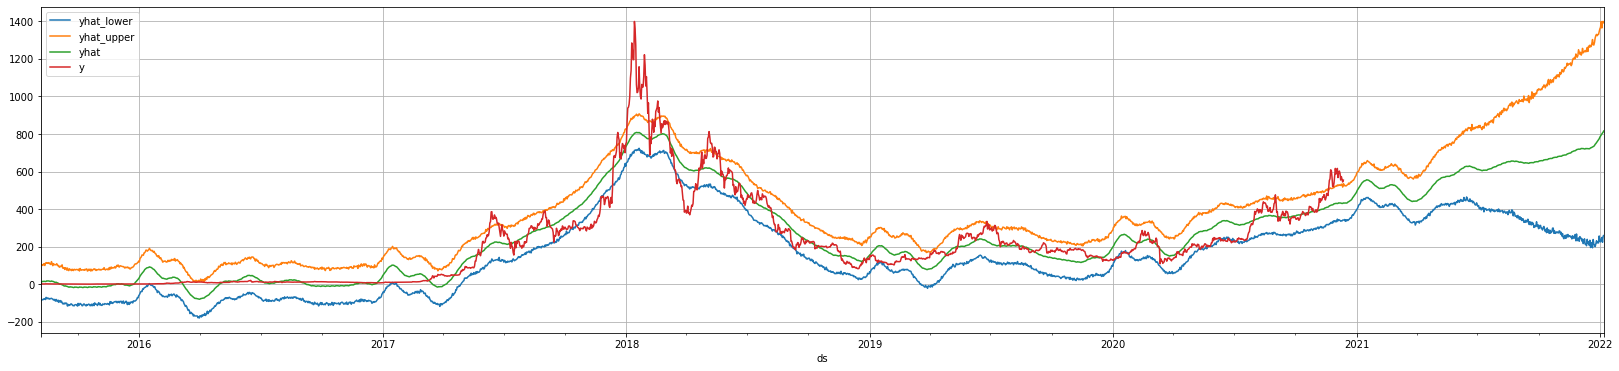

In [167]:
f = forecast[['ds','yhat_lower','yhat_upper','yhat']].copy()
ds1['ds'] = pd.to_datetime(ds1['ds'])
f1 = pd.merge(f, ds1, how='left', on='ds')
f1.plot(x='ds', figsize=(28, 6), grid=True)

/Users/igor/.local/share/virtualenvs/q-trader-FIeA7-di/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/igor/.local/share/virtualenvs/q-trader-FIeA7-di/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/igor/.local/share/virtualenvs/q-trader-FIeA7-di/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/igor/.local/share/virtualenvs/q-trader-FIeA7-di/l

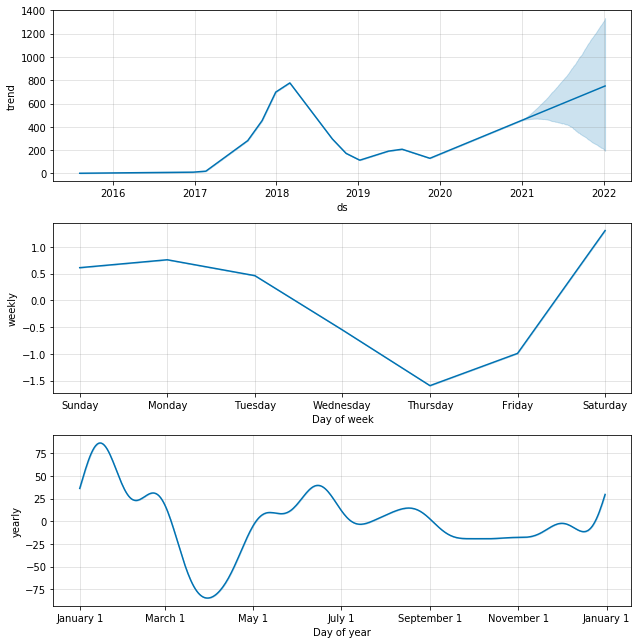

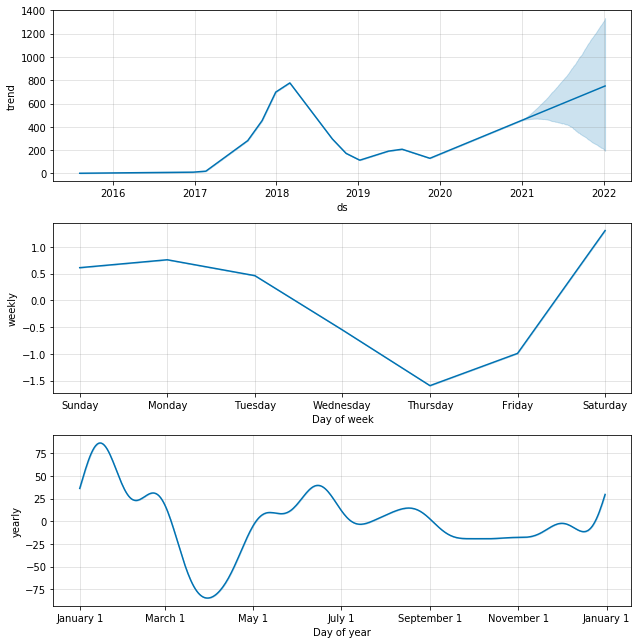

In [168]:
m.plot_components(forecast)